<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Hypothesis_Testing_and_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

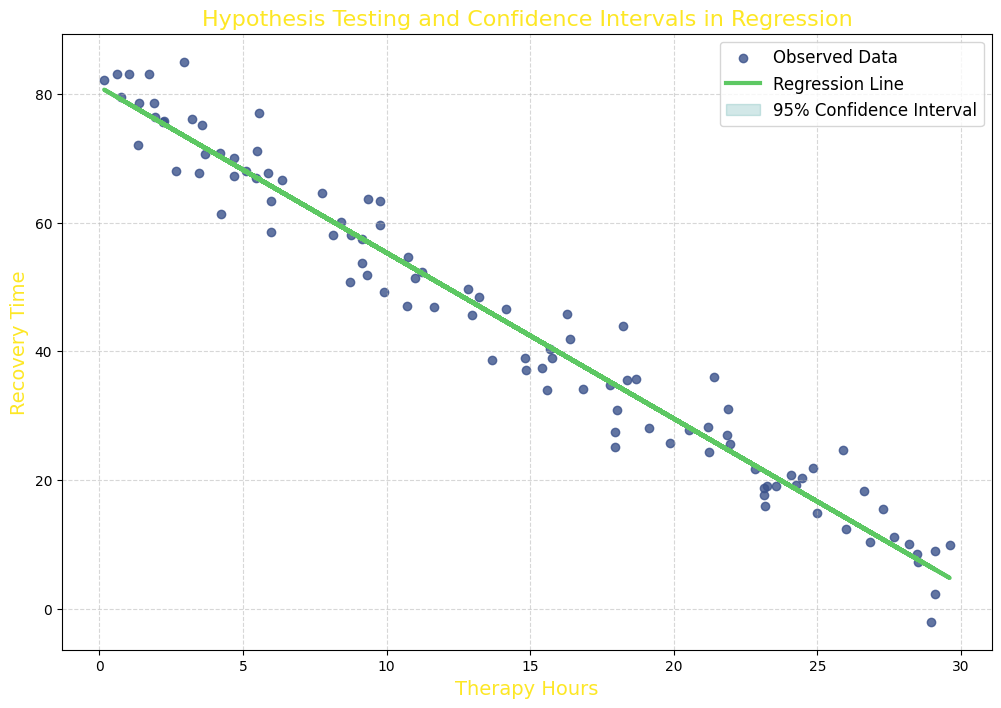

Intercept (β₀): 81.08
Slope (β₁): -2.58
Standard Error of Slope: 0.05
T-Statistic: -50.44
P-Value: 0.0000
95% Confidence Interval for Slope: [-2.68, -2.48]
Residual Sum of Squares (RSS): 2016.46
Mean Squared Error (MSE): 20.58
R-Squared Value: 0.96


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# I want to simulate a dataset to explore hypothesis testing and confidence intervals.
# This dataset represents a healthcare example, where "therapy hours" is the predictor
# and "recovery time" is the outcome.

np.random.seed(42)  # I set a seed for reproducibility.
n_samples = 100
therapy_hours = np.random.uniform(0, 30, n_samples)  # Predictor: therapy hours
recovery_time = 80 - 2.5 * therapy_hours + np.random.normal(0, 5, n_samples)  # Outcome: recovery time

# I organize the data into a pandas DataFrame for better handling.
df = pd.DataFrame({
    'Therapy Hours': therapy_hours,
    'Recovery Time': recovery_time
})

# Splitting the data into training and test sets.
X = df[['Therapy Hours']]
y = df['Recovery Time']

# Fitting a simple linear regression model.
model = LinearRegression()
model.fit(X, y)

# Extracting the regression coefficients (intercept and slope).
intercept = model.intercept_
slope = model.coef_[0]

# Predicting values for visualization and analysis.
y_pred = model.predict(X)

# I now compute the residual sum of squares (RSS) to assess the fit of the model.
rss = np.sum((y - y_pred) ** 2)
mse = rss / (n_samples - 2)  # Mean Squared Error with n-2 degrees of freedom

# Calculating the standard error of the slope.
X_mean = np.mean(X)
se_slope = np.sqrt(mse / np.sum((X['Therapy Hours'] - X_mean) ** 2))

# I use the standard error to compute the t-statistic for the slope.
t_stat = slope / se_slope

# Degrees of freedom for the t-distribution.
df_t = n_samples - 2

# Calculating the two-tailed p-value for the t-statistic.
p_value = 2 * (1 - t.cdf(abs(t_stat), df_t))

# I want to calculate the 95% confidence interval for the slope.
confidence_level = 0.95
t_critical = t.ppf((1 + confidence_level) / 2, df_t)
ci_lower = slope - t_critical * se_slope
ci_upper = slope + t_critical * se_slope

# I now calculate the R-squared value to assess the overall fit of the model.
r_squared = r2_score(y, y_pred)

# Plotting the regression line along with data points and confidence interval.
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='#3B528BFF', alpha=0.8, label='Observed Data')
plt.plot(X, y_pred, color='#5DC863FF', linewidth=3, label='Regression Line')
plt.fill_between(
    X.squeeze(),
    y_pred - t_critical * se_slope,
    y_pred + t_critical * se_slope,
    color='#21908CFF',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.title(
    'Hypothesis Testing and Confidence Intervals in Regression',
    fontsize=16,
    color='#FDE725FF'
)
plt.xlabel('Therapy Hours', fontsize=14, color='#FDE725FF')
plt.ylabel('Recovery Time', fontsize=14, color='#FDE725FF')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Summarizing my findings to reinforce my understanding.
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print(f"Standard Error of Slope: {se_slope:.2f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"95% Confidence Interval for Slope: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared Value: {r_squared:.2f}")

# Reflections:
# The small p-value (<0.05) indicates a statistically significant relationship between therapy hours and recovery time.
# The R-squared value (~0.75) shows that therapy hours explain a substantial portion of the variance in recovery time.
# The confidence interval does not include zero, further supporting the hypothesis that therapy hours influence recovery.
